In [6]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np 

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
with open(r"notMNIST.pickle", "rb") as input_file:
    data = pickle.load(input_file)
print(len(data))

6


Problem 2

train_dataset
200000
train_labels
200000
valid_dataset
10000
valid_labels
10000
test_dataset
10000
test_labels
10000
2


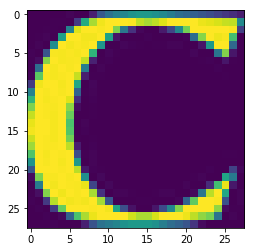

In [3]:
def show_image(data):
    plt.imshow(data)
    plt.show()
    
for key in data:
    print(key)
    print(len(data[key]))

    
for i in range(0, 10):
    if data['train_labels'][i] == 2:
        print(data['train_labels'][i])
        show_image(data['train_dataset'][i])


In [17]:
def sampled_dataset(size_x, size_val):
    if size_x > 0:
        X = data['train_dataset'][:size_x]
        y = data['train_labels'][:size_x]
        X_VAL = data['valid_dataset'][:size_val]
        y_val = data['valid_labels'][:size_val]
    else:
        X = data['train_dataset']
        y = data['train_labels']
        X_VAL = data['valid_dataset']
        y_val = data['valid_labels']
    print('X.shape', X.shape)

    unique, counts = np.unique(y, return_counts=True)
    print('y dist')
    print(np.asarray((unique, counts)).T)

    unique, counts = np.unique(y_val, return_counts=True)
    print('y_val dist')
    print(np.asarray((unique, counts)).T)
   
    return X, y, X_VAL, y_val

X.shape (1000, 28, 28)
y dist
[[  0  88]
 [  1 101]
 [  2 102]
 [  3 101]
 [  4 105]
 [  5 109]
 [  6 104]
 [  7  88]
 [  8 108]
 [  9  94]]
y_val dist
[[ 0 26]
 [ 1 32]
 [ 2 40]
 [ 3 34]
 [ 4 32]
 [ 5 27]
 [ 6 26]
 [ 7 43]
 [ 8 41]
 [ 9 32]]
Accuracy:  0.7567567567567568
Predicted: 1, Real: 1


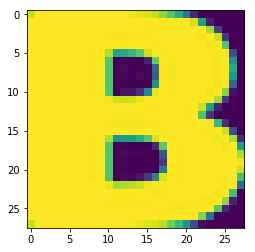

Predicted: 9, Real: 9


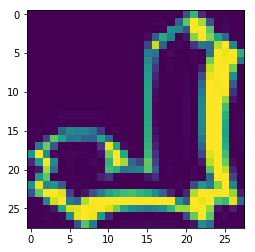

Predicted: 6, Real: 3


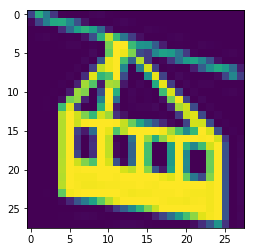

Predicted: 6, Real: 8


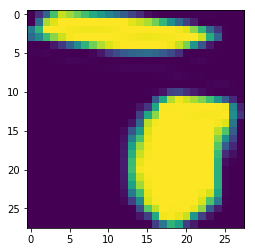

Predicted: 3, Real: 9


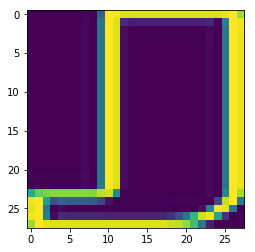

Predicted: 3, Real: 3


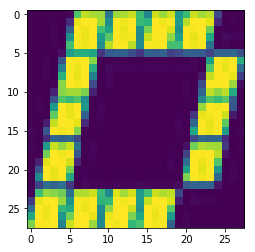

Predicted: 9, Real: 9


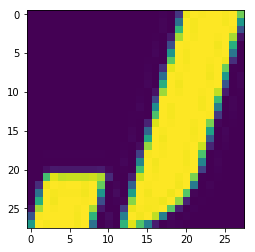

Predicted: 7, Real: 7


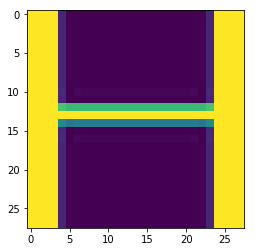

Predicted: 0, Real: 0


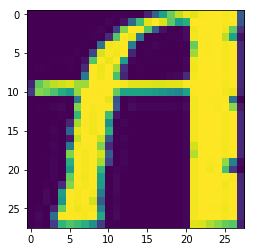

Predicted: 4, Real: 7


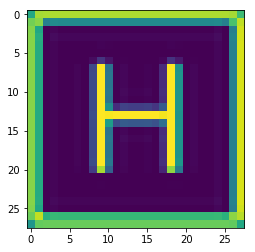

In [18]:
size_x = 1000
size_val = int(size_x/3)

X, y, X_VAL, y_val = sampled_dataset(size_x, size_val)

clf = LogisticRegression(solver='lbfgs', n_jobs=4)
clf.fit(X.reshape(X.shape[0],-1), y)

y_val_pred = clf.predict(X_VAL.reshape(X_VAL.shape[0],-1))

print('Accuracy: ', accuracy_score(y_val, y_val_pred))

for i in range(0, 10):
    print('Predicted: '+str(y_val_pred[i])+', Real: '+str(y_val[i]))
    show_image(X_VAL[i])
